c:\Users\trudy\TradingStuff\.conda\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


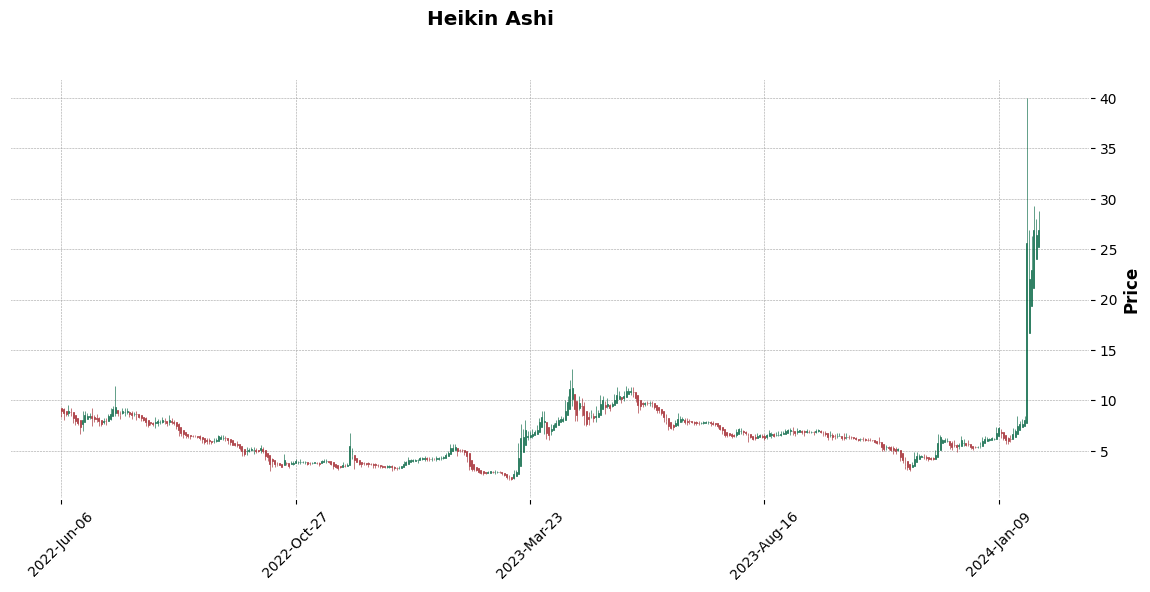

In [7]:
import yfinance as yf
import pandas as pd
import mplfinance as mpf
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

class HeikinAshiIndication:

    def __init__(self, ticker_price_data):
        self._data = ticker_price_data.copy()
        self.__df_orig = ticker_price_data

        for i in range(len(self._data)):
            self._data.loc[self._data.index[i],'Close'] = (ticker_price_data['Open'].iloc[i] + ticker_price_data['Close'].iloc[i] + ticker_price_data['Low'].iloc[i] +  ticker_price_data['High'].iloc[i])/4
            
            if i > 0:
                self._data.loc[self._data.index[i],'Open'] = (self._data.loc[self._data.index[i-1],'Open'] + self._data.loc[self._data.index[i-1],'Close'])/2
                self._data.loc[self._data.index[i],'High'] = max(ticker_price_data['High'].iloc[i], self._data.loc[self._data.index[i],'Open'], self._data.loc[self._data.index[i],'Close'])
                self._data.loc[self._data.index[i],'Low'] = min(ticker_price_data['Low'].iloc[i], self._data.loc[self._data.index[i],'Open'], self._data.loc[self._data.index[i],'Close'])

        self.__df_ha = self._data.iloc[1:,:]

    def plot_ha(self, plot_orig):
        if plot_orig: 
            ap1 = [mpf.make_addplot(self.__df_orig.iloc[1:,:], panel=1, type='candle')]
            mpf.plot(self._data, type='candle', style='charles', addplot=ap1, panel_ratios=(1,1), title='Heikin Ashi vs Candlestick', figsize=(15, 8))
        else:
            mpf.plot(self._data, type='candle', style='charles', title='Heikin Ashi', figsize=(15, 6))
            
            
    


class PriceData:

    __price_data = dict()
    __start_date = None
    __end_date = None

    def __init__(self, start_date, end_date, stocks):
        self.__start_date = start_date
        self.__end_date = end_date
        for stock in stocks:
            self.add_stock_to_data_frame(stock)

    def add_stock_to_data_frame(self, ticker):
        df = yf.download(ticker, 
                    start=self.__start_date, 
                    end=self.__end_date, 
                    progress=False, 
                )
        self.__price_data[ticker] = df

    def get_price_data(self):
        return self.__price_data

    def print_price_data(self):
        print(self.__price_data)


# Define the timeframe and stock symbol
start_date = '2022-6-05'
end_date = '2024-02-04'
stocks = {'CRBP'}  # Replace this with your desired stock symbols

# Create PriceData instance and fetch stock data
price_data = PriceData(start_date, end_date, stocks)
price_data_dict = price_data.get_price_data()

# Plot Heikin Ashi chart for the fetched stock
ha_indication = HeikinAshiIndication(price_data_dict['CRBP'])
ha_indication.plot_ha(False)  # Set True to plot both Candlestick and Heikin Ashi charts


In [8]:
import yfinance as yf
import pandas as pd
import mplfinance as mpf
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.tools as tls

class HeikinAshiIndication:

    def __init__(self, ticker_price_data):
        self._data = ticker_price_data.copy()
        self.__df_orig = ticker_price_data

        for i in range(len(self._data)):
            self._data.loc[self._data.index[i],'Close'] = (ticker_price_data['Open'].iloc[i] + ticker_price_data['Close'].iloc[i] + ticker_price_data['Low'].iloc[i] +  ticker_price_data['High'].iloc[i])/4
            
            if i > 0:
                self._data.loc[self._data.index[i],'Open'] = (self._data.loc[self._data.index[i-1],'Open'] + self._data.loc[self._data.index[i-1],'Close'])/2
                self._data.loc[self._data.index[i],'High'] = max(ticker_price_data['High'].iloc[i], self._data.loc[self._data.index[i],'Open'], self._data.loc[self._data.index[i],'Close'])
                self._data.loc[self._data.index[i],'Low'] = min(ticker_price_data['Low'].iloc[i], self._data.loc[self._data.index[i],'Open'], self._data.loc[self._data.index[i],'Close'])

        self.__df_ha = self._data.iloc[1:,:]

    def plot_ha(self, plot_orig):
        if plot_orig:
            ap1 = [mpf.make_addplot(self.__df_orig.iloc[1:,:], panel=1, type='candle')]
            fig, axes = mpf.plot(self._data, type='candle', style='charles', addplot=ap1, panel_ratios=(1,1), title='Heikin Ashi vs Candlestick', figsize=(15, 8), returnfig=True)

        else:
            fig, axes = mpf.plot(self._data, type='candle', style='charles', title='Heikin Ashi', figsize=(15, 6), returnfig=True)

        # Convert mplfinance chart to Plotly
        plotly_fig = tls.mpl_to_plotly(fig)
        return plotly_fig


class PriceData:

    __price_data = dict()
    __start_date = None
    __end_date = None

    def __init__(self, start_date, end_date, stocks):
        self.__start_date = start_date
        self.__end_date = end_date
        for stock in stocks:
            self.add_stock_to_data_frame(stock)

    def add_stock_to_data_frame(self, ticker):
        df = yf.download(ticker, 
                         start=self.__start_date, 
                         end=self.__end_date, 
                         progress=False)
        self.__price_data[ticker] = df

    def get_price_data(self):
        return self.__price_data

    def print_price_data(self):
        print(self.__price_data)


# Define the timeframe and stock symbol
start_date = '2022-6-05'
end_date = '2024-02-04'
stocks = {'CRBP'}  # Replace this with your desired stock symbols

# Create PriceData instance and fetch stock data
price_data = PriceData(start_date, end_date, stocks)
price_data_dict = price_data.get_price_data()

# Plot Heikin Ashi chart for the fetched stock using mplfinance with Plotly
ha_indication = HeikinAshiIndication(price_data_dict['CRBP'])
plotly_fig = ha_indication.plot_ha(False)  # Set True to plot both Candlestick and Heikin Ashi charts

# Show the Plotly chart
plotly_fig.show()



c:\Users\trudy\TradingStuff\.conda\Lib\site-packages\yfinance\utils.py:775: FutureWarning:

The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.

c:\Users\trudy\TradingStuff\.conda\Lib\site-packages\plotly\matplotlylib\renderer.py:571: UserWarning:

Dang! That path collection is out of this world. I totally don't know what to do with it yet! Plotly can only import path collections linked to 'data' coordinates

